# -------------------------------WEEK - 07------------------------------------

# 1) Play tennies prediction using Decision tree 

In [21]:
# -----------------------------
# 1. Load the dataset
# -----------------------------

df = pd.read_csv("C:/Users/Pramoda A S/Desktop/AIML Documents/DataSets in CSV files/Play Tennis.csv")
df.head()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [29]:
# Splitting thh data

X = df.drop(columns=['Day','Play_Tennis'])
y = df['Play_Tennis']

In [23]:
# LabelEncoder categorical features

X = pd.get_dummies(X)

le = LabelEncoder()
y = le.fit_transform(y)   


In [24]:
X.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temprature_Cool,Temprature_Hot,Temprature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,False,False,True,False,True,False,True,False,False,True
1,False,False,True,False,True,False,True,False,True,False
2,True,False,False,False,True,False,True,False,False,True
3,False,True,False,False,False,True,True,False,False,True
4,False,True,False,True,False,False,False,True,False,True


In [25]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [26]:

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [27]:
# -----------------------------
# 3. Decision Tree
# -----------------------------
dtc = DecisionTreeClassifier(criterion="entropy", random_state=42)
dtc.fit(X_train, y_train)
y_pred_dt = dtc.predict(X_test)

print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.4


In [28]:
# -----------------------------
# 4. Random Forest
# -----------------------------
rfc = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=42)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)

print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.4


# 2) Breast cancer prediction using Decision tree and RandomForest

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('C:/Users/Pramoda A S/Desktop/AIML Documents/DataSets in CSV files/Breast_Cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
x=df.drop(columns=(['id','diagnosis']))
y=df['diagnosis']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
#Predict the response for test dataset
y_pred = dtc.predict(X_test)

In [9]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9473684210526315


In [10]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[68,  3],
       [ 3, 40]])

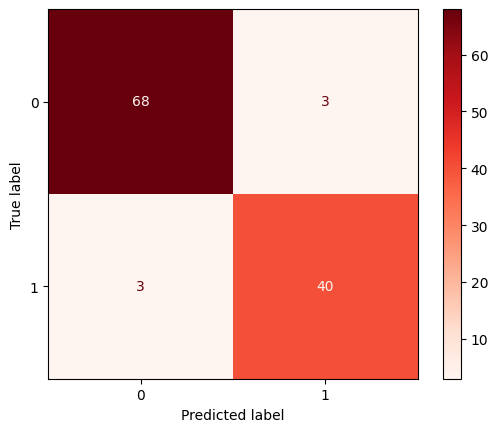

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = dtc.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.show()


In [14]:
# Evaluation Metrics

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



#  Using Random forest classifier for comparision 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier  

forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
#Predict the response for test dataset

y_pred = forest.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9649122807017544


In [18]:
# Cconfusion_matrix 

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[70,  1],
       [ 3, 40]])

In [20]:
# Classification_report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

